In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #handwritten digits 0-9, 28x28 pixels

(x_train, y_train), (x_test, y_test) = mnist.load_data() #unpacks mnist data

In [14]:
#scale values from [0-255] -> [0-1], makes it "easier to learn"
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1) 

model = tf.keras.models.Sequential()  #https://keras.io/guides/sequential_model/
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer

In [15]:
#calculating loss

#adam -> one version
#alt: stochastic gradient descent
#sparse vs binary (cat vs dog differentiation)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
#train
model.fit(x_train, y_train, epochs=3) 

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0729 - accuracy: 0.9775


In [17]:
#checking generalization of model on test data (rather than train data)
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 955us/step - loss: 0.0921 - accuracy: 0.9700
0.09210679680109024 0.9700000286102295


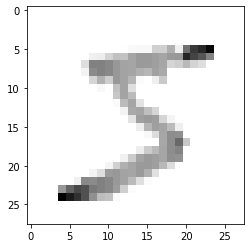

In [10]:
import matplotlib.pyplot as plt

#print first image
plt.imshow(x_train[0], cmap = plt.cm.binary) #2nd param to make b+w
plt.show()
#print(x_train[0]) 

In [18]:
model.save('myModel.model')

INFO:tensorflow:Assets written to: myModel.model/assets


INFO:tensorflow:Assets written to: myModel.model/assets


In [19]:
new_model = tf.keras.models.load_model('myModel.model')

In [20]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 914us/step


In [21]:
print(predictions)

[[2.05706258e-10 1.44231379e-07 5.11161079e-06 ... 9.99943972e-01
  7.29143590e-09 7.96626580e-07]
 [1.43556406e-07 1.81347481e-04 9.99731600e-01 ... 1.06343187e-07
  9.04978037e-07 8.28216176e-11]
 [1.44387897e-07 9.99936581e-01 4.34832964e-06 ... 1.95992052e-05
  1.24753233e-05 1.09369225e-07]
 ...
 [7.64989316e-09 8.17222912e-08 6.22240677e-08 ... 8.23294067e-06
  5.40072597e-06 3.41049090e-05]
 [4.19056596e-06 5.45415605e-06 1.93181631e-06 ... 8.45127204e-07
  2.75897793e-04 2.62215025e-07]
 [1.21481378e-07 3.09737764e-08 1.40962051e-08 ... 2.80735962e-10
  2.19480455e-07 2.10952839e-10]]


In [22]:
import numpy as np

print(np.argmax(predictions[0])) #predicts that they 0th test image is a "insert"

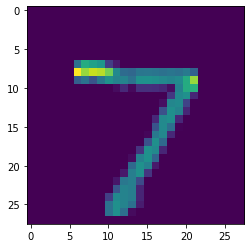

In [23]:
plt.imshow(x_test[0])
plt.show()